# Access Scores

## Calculating the Access Score
---
In the following lines, first the _total access score_ will be estimated followed by an example of the _aggregation_ of the data. Finally, the score will be calculated for a _subset_ of the data (where one or several categories is selected).

**Specifications for the Access Model:**  

**name.AccessModel( ):**  
- network_type ('drive' or 'walk')
- source_filename (primary input data) 
- dest_filename (secondary input data)  
- sp_matrix_filename (origin-destination travel time matrix)    
- decay_function ('linear', 'root', 'logit')  
- limit_categories (only estimate model for specific categories)

**name.calculate():**
- custom_weight_dict (Specifies the weights of each facility/establishment defined as a previously generated dictionary. If custom_weight_dict=None, the dictionary will contain [1,1,1,1,1,1,1,1,1,1] weights.)
- largest_weights_first=True sorts the weight array such that the largest values will be used first. If False, it will do the opposite.
- limit_categories (None is defined as default, but user can delimit on particular categories of interest to calculate the access score.)  
- upper (is the time (in minutes) in which the origin and destinations are considered to be out of range of each other. As a default, if the travel time distance exceeds 30 minutes, the score will be zero.)
- custom_threshold=40 (change binning threshold specifying it in calculate() function. Example: model_name.calculate(custom_threshold=40) for changing the percent of population above a certain threshold.)
- normalize (Default is True and shows both normalized and non-normalized values. False shows only non-normalized results.)  


Functions within the Access Model class (use as name.function()):  
- calculate () 
- get_aggregate (aggregate_type) Aggregation can be by ('access') score for the lower aral unit. If the user wants to modify the level of aggregation, change 'community' with other spatial unit of analysis in code.  
- write_aggregate (aggregate_type, filename='name')
- plot_cdf  (title='CDF Access Score')
- write_csv (filename='name') 

In the **scripts**, the user can specify:  The default weights set before as [1,1,1,1,1,1,1,1,1,1] weights, different standarizations, and other modifications to the access score.  

Dictionary weights should be set as the following example:  
**dict = {  
"Hospitals": [10,10,10,10,10],  
"Federally Qualified Health Centers": [8, 7, 6, 5, 4],  
"School-Based Health Centers": [7, 7, 6, 6, 5],  
"All Free Health Clinics": [5, 5, 5, 4, 4],  
"Other Health Providers": [4,3,2,1,1]  
}**

In [1]:
import sys, os
os.chdir('scripts')

from CommunityAnalytics import *
import pandas as pd

%matplotlib inline

In [2]:
#View sources and destinations for Chicago Health Facilities
sources=pd.read_csv('data/ORIG/tracts2010.csv')
dest=pd.read_csv('data/DEST/health_chicago.csv')

In [3]:
sources.head()

geoid10        lon        lat  Pop2014  Pov14  community
0  17031842400 -87.630040  41.742475     5157    769         44
1  17031840300 -87.681882  41.832094     5881   1021         59
2  17031841100 -87.635098  41.851006     3363   2742         34
3  17031841200 -87.683342  41.855562     3710   1819         31
4  17031838200 -87.675079  41.870416     3296    361         28

In [4]:
dest.head()

ID                                           Facility        lat  \
0   1    American Indian Health Service of Chicago, Inc.  41.956676   
1   2       Hamdard Center for Health and Human Services  41.997852   
2   3                  Infant Welfare Society of Chicago  41.924904   
3   4  Mercy Family - Henry Booth House Family Health...  41.841694   
4   6       Cook County - Dr. Jorge Prieto Health Center  41.847143   

         lon  Type  target                category  community  
0 -87.651879     5  127000  Other Health Providers          3  
1 -87.669535     5  190000  Other Health Providers         77  
2 -87.717270     5  137000  Other Health Providers         22  
3 -87.624790     5  159000  Other Health Providers         35  
4 -87.724975     5  166000  Other Health Providers         30

In [8]:
#the last already generated a shortest path matrix, so we can reuse that instead of regenerating it.
#Specify the distance decay function here.

access = AccessModel(network_type='walk',
                     sp_matrix_filename='data/matrices/walk_asym_health_tracts.csv',
                     source_filename='data/ORIG/tracts2010.csv',
                     dest_filename='data/DEST/health_chicago.csv',
                     decay_function='logit')

The variables in your data set are:
>  geoid10
>  lon
>  lat
>  Pop2014
>  Pov14
>  community
If you have no population variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
The variables in your data set are:
>  ID
>  Facility
>  lat
>  lon
>  Type
>  target
>  category
>  community
If you have no target variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
If you have no category variable, write "skip" (no quotations)


INFO:ScoreModel:Loaded sp matrix from file: data/matrices/walk_asym_health_tracts.csv
INFO:ScoreModel:Finished loading sp_matrix in 0.24 seconds
INFO:ScoreModel:Processing... This could take a while
INFO:ScoreModel:Finished processing ModelData in 0.11 seconds


In [62]:
access.near_nbr = {}
for s,val in access.dicto.items():
    access.near_nbr[s] = {}
    if access.category_set == set(["CAT_UNDEFINED"]):
        access.near_nbr[s] = d[1]


IndentationError: expected an indented block (<ipython-input-62-5c9aba480a8c>, line 5)

In [39]:
for d in val:
    access.near_nbr[s] = d[0]
    no_cat -=1

In [61]:
access.near_nbr

{'17031081300': 25827,
 '17031410100': 26844,
 '17031030603': 33185,
 '17031071400': 27955,
 '17031400800': 27049,
 '17031030703': 32639,
 '17031031501': 31682,
 '17031031502': 31406,
 '17031031800': 32058,
 '17031281900': 24835,
 '17031081500': 25354,
 '17031063200': 29356,
 '17031063302': 28860,
 '17031063400': 28987,
 '17031063100': 29556,
 '17031063301': 29005,
 '17031031300': 32057,
 '17031611900': 24424,
 '17031440202': 30721,
 '17031241400': 27733,
 '17031834600': 26185,
 '17031100400': 38722,
 '17031720400': 30807,
 '17031490700': 32366,
 '17031730600': 31623,
 '17031836000': 25064,
 '17031280400': 26022,
 '17031243100': 26662,
 '17031242200': 27233,
 '17031050100': 31584,
 '17031010701': 35424,
 '17031050700': 30596,
 '17031051200': 30309,
 '17031051300': 29881,
 '17031440101': 30373,
 '17031700100': 27033,
 '17031710100': 28363,
 '17031710400': 27782,
 '17031260900': 27200,
 '17031300700': 24943,
 '17031271400': 27126,
 '17031301600': 24455,
 '17031490901': 33983,
 '170315603

In [28]:
access.dicto.items()

dict_items([('17031081300', [(128, 317), (159, 410), (149, 446), (76, 721), (77, 2122), (14, 3181), (56, 3217), (154, 3557), (203, 3609), (119, 3776), (118, 3923), (107, 3966), (204, 4077), (156, 4088), (125, 4098), (162, 4141), (71, 4188), (175, 4209), (106, 4246), (185, 4249), (53, 4310), (8, 4379), (137, 4379), (112, 4449), (109, 4475), (146, 4475), (96, 4636), (155, 4639), (205, 4677), (172, 4690), (198, 4774), (4, 4778), (36, 4809), (136, 4819), (194, 4987), (200, 5016), (58, 5031), (91, 5046), (150, 5046), (30, 5091), (92, 5138), (101, 5258), (170, 5310), (79, 5337), (110, 5346), (180, 5367), (27, 5377), (108, 5463), (1, 5472), (102, 5555), (26, 5653), (11, 5673), (10, 5731), (115, 5771), (33, 5797), (178, 5914), (163, 5995), (148, 6032), (173, 6052), (182, 6107), (84, 6123), (111, 6167), (68, 6190), (186, 6205), (192, 6231), (195, 6293), (104, 6421), (132, 6446), (70, 6449), (129, 6460), (105, 6505), (183, 6505), (166, 6531), (39, 6568), (160, 6574), (199, 6617), (69, 6635), (31

In [26]:
access.near_nbr

{'17031081300': 25827,
 '17031410100': 26844,
 '17031030603': 33185,
 '17031071400': 27955,
 '17031400800': 27049,
 '17031030703': 32639,
 '17031031501': 31682,
 '17031031502': 31406,
 '17031031800': 32058,
 '17031281900': 24835,
 '17031081500': 25354,
 '17031063200': 29356,
 '17031063302': 28860,
 '17031063400': 28987,
 '17031063100': 29556,
 '17031063301': 29005,
 '17031031300': 32057,
 '17031611900': 24424,
 '17031440202': 30721,
 '17031241400': 27733,
 '17031834600': 26185,
 '17031100400': 38722,
 '17031720400': 30807,
 '17031490700': 32366,
 '17031730600': 31623,
 '17031836000': 25064,
 '17031280400': 26022,
 '17031243100': 26662,
 '17031242200': 27233,
 '17031050100': 31584,
 '17031010701': 35424,
 '17031050700': 30596,
 '17031051200': 30309,
 '17031051300': 29881,
 '17031440101': 30373,
 '17031700100': 27033,
 '17031710100': 28363,
 '17031710400': 27782,
 '17031260900': 27200,
 '17031300700': 24943,
 '17031271400': 27126,
 '17031301600': 24455,
 '17031490901': 33983,
 '170315603

In [18]:
access.dicto.values()

dict_values([[(128, 317), (159, 410), (149, 446), (76, 721), (77, 2122), (14, 3181), (56, 3217), (154, 3557), (203, 3609), (119, 3776), (118, 3923), (107, 3966), (204, 4077), (156, 4088), (125, 4098), (162, 4141), (71, 4188), (175, 4209), (106, 4246), (185, 4249), (53, 4310), (8, 4379), (137, 4379), (112, 4449), (109, 4475), (146, 4475), (96, 4636), (155, 4639), (205, 4677), (172, 4690), (198, 4774), (4, 4778), (36, 4809), (136, 4819), (194, 4987), (200, 5016), (58, 5031), (91, 5046), (150, 5046), (30, 5091), (92, 5138), (101, 5258), (170, 5310), (79, 5337), (110, 5346), (180, 5367), (27, 5377), (108, 5463), (1, 5472), (102, 5555), (26, 5653), (11, 5673), (10, 5731), (115, 5771), (33, 5797), (178, 5914), (163, 5995), (148, 6032), (173, 6052), (182, 6107), (84, 6123), (111, 6167), (68, 6190), (186, 6205), (192, 6231), (195, 6293), (104, 6421), (132, 6446), (70, 6449), (129, 6460), (105, 6505), (183, 6505), (166, 6531), (39, 6568), (160, 6574), (199, 6617), (69, 6635), (31, 6644), (80, 6

In [8]:
for s, val in access.source2dest.items():
    access.n_dests_in_range[s] = {}
    
    if access.category_set == set(["CAT_UNDEFINED"]):
        access.n_dests_in_range[s] +=1 



SyntaxError: unexpected EOF while parsing (<ipython-input-8-1e8187c3df89>, line 5)

In [22]:
len(access.source2dest.keys())

801

In [37]:
for s, val in access.source2dest.items():
    #print value
    access.n_dests_in_range[s] = {}
    access.n_dests_in_range[s]= len([item for item in val if item])

In [33]:
ok

(17031530501, 0)

In [44]:
if access.category_set == set(["CAT_UNDEFINED"]):
    print("Hello")
else:
    print("Full")

Hello


In [ ]:
"CAT_UNDEFINED"

In [20]:
type(access.category_set)

set

In [36]:
a=access.category_set

In [38]:
print(a)

{'CAT_UNDEFINED'}


In [6]:
#Example of density and variety weights:
dict = {
"Hospitals": [10,10,10,10,10],
"Federally Qualified Health Centers": [8, 7, 6, 5, 4],
"School-Based Health Centers": [7, 7, 6, 6, 5],
"All Free Health Clinics": [5, 5, 5, 4, 4],
"Other Health Providers": [4, 3, 2, 1, 1]
}

In [7]:
access.calculate(custom_threshold=40,
                 normalize=True,
                 custom_weight_dict=dict,
                 largest_weights_first=True)

INFO:ScoreModel:Finished calculating hssa in 0.13 seconds


In [8]:
#Output
access.results.head()

lat        lon  population  lower_areal_unit     access  \
geoid10                                                                      
17031842400  41.742475 -87.630040      5157.0              44.0   0.054373   
17031840300  41.832094 -87.681882      5881.0              59.0   6.551565   
17031841100  41.851006 -87.635098      3363.0              34.0   9.284239   
17031841200  41.855562 -87.683342      3710.0              31.0  20.034265   
17031838200  41.870416 -87.675079      3296.0              28.0  40.359906   

             access_cat  access_sd  
geoid10                             
17031842400         7.0   0.126241  
17031840300        22.0  15.211203  
17031841100        44.0  21.555834  
17031841200        96.0  46.514881  
17031838200       111.0  93.706271

**Scores:**  
- access_cat is the count of weights by tract.  
- access is the sum of the final score obtained from multiplying each weight by the distance decay for each establishment.  
- Finally, access_sd is the normalized access score by doing:  
$$access sd=\frac{access-min}{max-min}$$

Merge the scores to the origin's shapefile and map out the scores in order to view the distribution of the access scores by tract:

<img src="scripts/data/figures/access_sd.png" width="900"  title="Optional title">


By constructing the access model, we can do several things:
- Write to csv
- Aggregate
- Get count of nearby destinations metric
- Get time to closest destination metric

In [38]:
#Write output to csv
access.write_csv()

#Saved as Access_walk_health_tracts.csv

In [5]:
tt=TTMetrics(network_type='walk',
             sp_matrix_filename='data/matrices/walk_asym_health_tracts.csv',
             source_filename='data/ORIG/tracts2010.csv',
             dest_filename='data/DEST/health_chicago.csv')

The variables in your data set are:
>  geoid10
>  lon
>  lat
>  Pop2014
>  Pov14
>  community
If you have no population variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
The variables in your data set are:
>  ID
>  Facility
>  lat
>  lon
>  Type
>  target
>  category
>  community
If you have no target variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
If you have no category variable, write "skip" (no quotations)


INFO:ScoreModel:Loaded sp matrix from file: data/matrices/walk_asym_health_tracts.csv
INFO:ScoreModel:Finished loading sp_matrix in 0.24 seconds
INFO:ScoreModel:Processing... This could take a while
INFO:ScoreModel:Finished processing ModelData in 0.11 seconds


In [6]:
tt.calculate()

In [7]:
tt.n_dests_in_range

Hospitals  School-Based Health Centers  All Free Health Clinics  \
17031010100        1.0                          0.0                      0.0   
17031010201        1.0                          0.0                      0.0   
17031010202        1.0                          1.0                      0.0   
17031010300        0.0                          1.0                      0.0   
17031010400        1.0                          1.0                      0.0   
17031010501        0.0                          1.0                      0.0   
17031010502        1.0                          2.0                      0.0   
17031010503        1.0                          2.0                      0.0   
17031010600        1.0                          2.0                      0.0   
17031010701        1.0                          1.0                      0.0   
17031010702        0.0                          1.0                      0.0   
17031020100        1.0                          0.0                      0.0   
17031020200        1.0                          0.0                      1.0   
17031020301        0.0                          0.0                      1.0   
17031020302        0.0                          0.0                      2.0   
17031020400        1.0                          1.0                      1.0   
17031020500        0.0                          1.0                      2.0   
17031020601        0.0                          0.0                      2.0   
17031020602        0.0                          0.0                      2.0   
17031020701        1.0                          0.0                      2.0   
17031020702        0.0                          0.0                      2.0   
17031020801        1.0                          1.0                      2.0   
17031020802        0.0                          0.0                      2.0   
17031020901        0.0                          2.0                      2.0   
17031020902        1.0                          2.0                      2.0   
17031030101        1.0                          2.0                      0.0   
17031030102        1.0                          2.0                      0.0   
17031030103        1.0                          2.0                      0.0   
17031030104        1.0                          2.0                      0.0   
17031030200        1.0                          2.0                      0.0   
...                ...                          ...                      ...   
17031841100        1.0                          2.0                      1.0   
17031841200        4.0                          4.0                      0.0   
17031841300        0.0                          2.0                      0.0   
17031841400        3.0                          1.0                      0.0   
17031841500        4.0                          1.0                      1.0   
17031841600        3.0                          1.0                      0.0   
17031841700        3.0                          1.0                      0.0   
17031841800        1.0                          1.0                      0.0   
17031841900        0.0                          1.0                      1.0   
17031842000        1.0                          4.0                      0.0   
17031842100        1.0                          2.0                      0.0   
17031842200        0.0                          0.0                      0.0   
17031842300        0.0                          0.0                      0.0   
17031842400        0.0                          1.0                      0.0   
17031842500        1.0                          0.0                      1.0   
17031842600        0.0                          0.0                      0.0   
17031842800        0.0                          1.0                      0.0   
17031842900        6.0                          4.0                      0.0   
17031843000  

In [5]:
tt.n_dests_in_range=pd.DataFrame(tt.n_dests_in_range)

In [6]:
tt.n_dests_in_range

n_dests
17031081300        4
17031410100        0
17031030603        8
17031071400        0
17031400800        7
17031030703       11
17031031501       11
17031031502       12
17031031800       14
17031281900        2
17031081500        4
17031063200        5
17031063302        5
17031063400        6
17031063100        8
17031063301        5
17031031300       10
17031611900        6
17031440202        0
17031241400        8
17031834600        5
17031100400        1
17031720400        1
17031490700        3
17031730600        1
17031836000       11
17031280400       10
17031243100       12
17031242200       11
17031050100        9
...              ...
17031841300        9
17031310900       17
17031252201        5
17031340400        9
17031221300        7
17031570400        4
17031251000        1
17031230500        4
17031842800        2
17031842300        3
17031070700        1
17031080400        3
17031611500        5
17031351400        8
17031630100        4
17031380200       12
17031836100       10
17031032100       12
17031140701        8
17031061800       10
17031030104        6
17031030102        5
17031030101        5
17031031200       12
17031770602        0
17031740400        0
17031080300        4
17031291200       13
17031081900        5
17031530501        0

[801 rows x 1 columns]

In [18]:
type(df)

method

In [2]:
tt2=TTMetrics(network_type='walk',
             sp_matrix_filename='data/matrices/walk_asym_health_tracts.csv',
             source_filename='data/ORIG/tracts2010.csv',
             dest_filename='data/DEST/health_chicago.csv')

The variables in your data set are:
>  geoid10
>  lon
>  lat
>  Pop2014
>  Pov14
>  community
If you have no population variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
The variables in your data set are:
>  ID
>  Facility
>  lat
>  lon
>  Type
>  target
>  category
>  community
If you have no target variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
If you have no category variable, write "skip" (no quotations)


INFO:ScoreModel:Loaded sp matrix from file: data/matrices/walk_asym_health_tracts.csv
INFO:ScoreModel:Finished loading sp_matrix in 0.20 seconds
INFO:ScoreModel:Processing... This could take a while
INFO:ScoreModel:Finished processing ModelData in 0.12 seconds


In [3]:
tt2.calculate()

In [4]:
tt2.n_dests_in_range.head()

0  CAT_UNDEFINED
17031081300  4            NaN
17031410100  0            NaN
17031030603  8            NaN
17031071400  0            NaN
17031400800  7            NaN

### Aggregation at a greater areal level

In [7]:
#Get the output of the aggrregation by access by community area
access._get_aggregate('access').head()

access
lower_areal_unit           
44                 0.033946
59                 4.633144
34                 5.627126
31                15.149919
28                16.716169

In [37]:
#For community areas write to csv
access.write_aggregate('access')

#Saved as access_aggregate_health_tracts_comm.csv

INFO:ScoreModel:Wrote aggregate to file: data/access_metrics/access_aggregate_0.csv


<img src="scripts/data/figures/access_com.png" width="900"  title="Optional title">

## Plot

The following cumulative distribution function shows the percentage of tracts that fall within an access score.

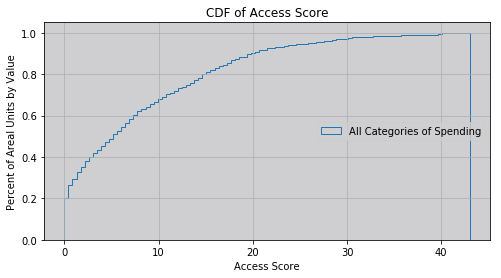

INFO:ScoreModel:Plot was saved to: data/figures/fig_5.png


In [9]:
access.plot_cdf('CDF of Access Score')

## Subsetting the data to calculate the Access Score

In [26]:
#For Federally Qualified Health Centers (walking)
access_fed = AccessModel(network_type='walk',
                         sp_matrix_filename='data/matrices/walk_asym_health_tracts.csv',
                         source_filename='data/ORIG/tracts2010.csv',
                         dest_filename='data/DEST/health_chicago.csv',
                         decay_function='logit',
                         limit_categories=set(['Federally Qualified Health Centers']))


The variables in your data set are:
>  geoid10
>  lon
>  lat
>  Pop2014
>  Pov14
>  community
If you have no population variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
The variables in your data set are:
>  ID
>  Facility
>  lat
>  lon
>  Type
>  target
>  category
>  community
If you have no target variable, write "skip" (no quotations)
If you have no lower areal unit variable, write "skip" (no quotations)
If you have no category variable, write "skip" (no quotations)


INFO:ScoreModel:Loaded sp matrix from file: data/matrices/walk_asym_health_tracts.csv
INFO:ScoreModel:Finished loading sp_matrix in 0.14 seconds
INFO:ScoreModel:Processing... This could take a while
INFO:ScoreModel:Finished processing ModelData in 0.06 seconds


In [27]:
#Example of density and variety weights:
dict = {
"Federally Qualified Health Centers": [10,10,10,10,10]
}

In [28]:
access_fed.calculate(custom_threshold=40,
                 normalize=True,
                 custom_weight_dict=dict,
                 largest_weights_first=True)

INFO:ScoreModel:Finished calculating hssa in 0.02 seconds


In [29]:
access_fed.results.head()

lat        lon  population  lower_areal_unit     access  \
geoid10                                                                      
17031842400  41.742475 -87.630040      5157.0              44.0   0.000000   
17031840300  41.832094 -87.681882      5881.0              59.0   8.157979   
17031841100  41.851006 -87.635098      3363.0              34.0   0.650705   
17031841200  41.855562 -87.683342      3710.0              31.0  16.836674   
17031838200  41.870416 -87.675079      3296.0              28.0   7.261582   

             access_cat  access_sd  
geoid10                             
17031842400         0.0   0.000000  
17031840300        20.0  22.341129  
17031841100        10.0   1.781996  
17031841200        50.0  46.108270  
17031838200        40.0  19.886291

In [31]:
access_fed.results.to_csv('data/access_metrics/FQHC.csv')

<img src="scripts/data/figures/access_fed.png" width="900"  title="Optional title">

Should I add comparison between different distance decay functions and/or weights?  As an illustrative purpose?